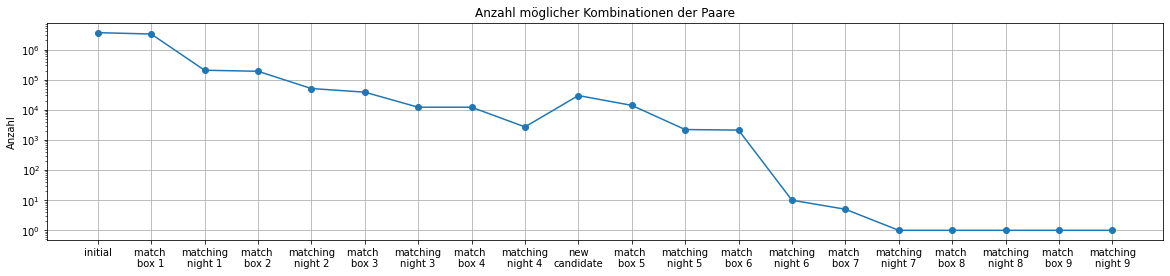

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import factorial
from itertools import product, permutations, combinations
from scipy.optimize import curve_fit

# -----------------------------INPUT----------------------------

names_f = { 1: 'Dana', 2: 'Estelle', 3: 'Isabelle', 4: 'Jessica', 5: 'Joelina', 6: 'Kerstin', 7: 'Marie', 8: 'Monami', 9: 'Raphaela', 10: 'Zaira', 11: 'Desiree'}
names_m = { 1: 'Andre', 2: 'Antonino', 3: 'Dustin', 4: 'Jordi', 5: 'Leon', 6: 'Marius', 7: 'Max', 8: 'Mike', 9: 'Tim', 10: 'William'}

number_of_nights = 9

matchbox_names = [('Jessica', 'Mike'), ('Monami', 'Leon'), ('Raphaela', 'Andre'), ('Dana', 'William'), ('Monami', 'Antonino'), ('Jessica', 'Max'), ('Zaira', 'Marius'), ('Raphaela','Jordi'), ('Kerstin','Max')]
match = [False, False, False, None, False, False, True, False, False]
sold = [False, False, False, True, False, False, False, False, False]

matching_night_strings = [
'Jessica und Leon,Joelina und Mike,Kerstin und Max,Monami und Antonino,Marie und Tim,Zaira und Dustin,Dana und William,Isabelle und Marius,Raphaela und Andre,Estelle und Jordi',
'Raphaela und William,Estelle und Leon,Zaira und Jordi,Joelina und Mike,Kerstin und Max,Isabelle und Dustin,Marie und Marius,Monami und Antonino,Dana und Andre,Jessica und Tim',
'Raphaela und Andre,Kerstin und Antonino,Monami und Max,Marie und Tim,Dana und William,Joelina und Mike,Zaira und Dustin,Isabelle und Marius,Estelle und Leon,Jessica und Jordi',
'Estelle und Leon,Dana und William,Monami und Antonino,Zaira und Dustin,Joelina und Mike,Marie und Max,Raphaela und Jordi,Kerstin und Tim,Isabelle und Andre,Jessica und Marius',
'Jessica und Leon,Estelle und Mike,Raphaela und Marius,Desiree und Tim,Joelina und Andre,Isabelle und Dustin,Monami und Max,Kerstin und Antonino,Zaira und Jordi,Dana und William',
'Estelle und Mike,Raphaela und William,Dana und Antonino,Zaira und Marius,Isabelle und Dustin,Jessica und Leon,Marie und Andre,Kerstin und Max,Joelina und Tim,Desiree und Jordi',
'Raphaela und William,Dana und Antonino,Isabelle und Dustin,Monami und Jordi,Desiree und Andre,Marie und Max,Kerstin und Tim,Joelina und Mike,Jessica und Leon,Zaira und Marius',
'Dana und Antonino,Raphaela und William,Jessica und Leon,Estelle und Mike,Joelina und Tim,Marie und Andre,Isabelle und Dustin,Kerstin und Max,Monami und Jordi,Zaira und Marius',
'Raphaela und Max,Marie und William,Desiree und Andre,Dana und Dustin,Isabelle und Antonino,Estelle und Mike,Joelina und Tim,Monami und Jordi,Jessica und Leon,Zaira und Marius']
lichter = [3, 2, 2, 3, 2, 4, 6, 4, 2]

# -----------------------------DEFINITIONS----------------------------

def name_to_number(name, dictionary):
    return list(dictionary.keys())[list(dictionary.values()).index(name)]

def random_choice(combinations_list):
    print('Es könnte die Kombination\n')
    comb = random.choice(combinations_list)
    for i in range(n): # Loop über alle 10 Paare
        print(names_f[comb[i][0]] + ' und ' + names_m[comb[i][1]])
    print('\nrichtig sein. Oder {} andere.'.format(len(combinations_list)-1))

def create_pair(name_f, name_m):
    return (name_to_number(name_f, names_f), name_to_number(name_m, names_m))

def matchbox(name_f, name_m, combinations_list, match = False): 
    pair = create_pair(name_f, name_m)
    indices = []
    for i, comb in enumerate(combinations_list):
        if pair in comb:
            indices += [i] # indices of all combinations containing pair
    mask = [not match]*len(combinations_list) # all False for match = True, all True for match = False
    for x in indices:
        mask[x] = match # True for match = True, False for match = False
    new_possible_combinations_array = np.array(combinations_list)[mask] 
    new_possible_combinations = [[tuple(x) for x in comb] for comb in new_possible_combinations_array]
    return new_possible_combinations

def create_guess(string, personsplit=' und ', paarsplit = ','):
    namen = [item.split(personsplit) for item in string.split(paarsplit)]
    nummern = [(name_to_number(namen[i][0], names_f),name_to_number(namen[i][1], names_m)) for i in range(len(namen))]
    nummern_sorted = sorted(nummern)
    return nummern_sorted

def find_missing(liste):
    for i in range(n):
        if liste[i][0] != i+1:
            counter = i
            break
        else:
            counter = n-1
    return counter

def gleich(comb1, comb2): # Wie viele Paare in zwei Kombinationen sind gleich
    missing_1 = find_missing(comb1)
    missing_2 = find_missing(comb2)
    comb1_copy = comb1[:]
    comb2_copy = comb2[:]
    if missing_1 != missing_2:
        del comb1_copy[missing_2]
        del comb2_copy[missing_1]
    return sum(a==b for a,b in zip(comb1_copy, comb2_copy)) # zip(a,b) = (a1,b1) ; (a2,b2) ; (a3,b3)

def matching_night(guess, anzahl, combinations_list): 
    indices = []
    for i, comb in enumerate(combinations_list):
        if gleich(comb, guess) == anzahl: 
            indices += [i]
    mask = [False]*len(combinations_list)
    for x in indices:
        mask[x] = True
    combinations_left_array = np.array(combinations_list)[mask] 
    combinations_left_list = [[tuple(x) for x in comb] for comb in combinations_left_array]
    return combinations_left_list

def new_candidate(possible_combinations):
    new_possible_combinations = []
    for comb in possible_combinations:
        for i in range(n):
            new_comb = comb[:]
            new_comb[i] = (n+1,new_comb[i][1])
            new_possible_combinations += [sorted(new_comb)]
    return possible_combinations + new_possible_combinations

# -----------------------------CALCULATION----------------------------

n = 10
all_pairs = [list(product((i,), range(1,n+1))) for i in range(1,n+1)]
possible_combinations = [[all_pairs[j][perm[j]] for j in range(n)] for perm in list(permutations(range(n)))]

events = ['initial']
lengths = [len(possible_combinations)]

for i in range(number_of_nights):
    events += ['match \nbox {}'.format(i+1), 'matching\nnight {}'.format(i+1)]
    if sold[i] == False:
        possible_combinations = matchbox(matchbox_names[i][0], matchbox_names[i][1], possible_combinations, match = match[i])
    lengths += [len(possible_combinations)]
    possible_combinations = matching_night(create_guess(matching_night_strings[i]), lichter[i], possible_combinations)
    lengths += [len(possible_combinations)]
    if i == 3: #4te Nacht
        events += ['new\ncandidate']
        possible_combinations = new_candidate(possible_combinations)
        lengths += [len(possible_combinations)]
        
# -----------------------------PLOT----------------------------
        
fig = plt.figure(figsize = (number_of_nights*2+2,4))
pos = range(number_of_nights*2+2)
plt.errorbar(pos, lengths, marker = 'o')
plt.xticks(pos, events)
plt.title('Anzahl möglicher Kombinationen der Paare')
plt.ylabel('Anzahl')
plt.yscale('log')
plt.grid()
plt.show()

In [2]:
random_choice(possible_combinations)

Es könnte die Kombination

Dana und Antonino
Estelle und Jordi
Isabelle und Andre
Jessica und Leon
Joelina und Mike
Kerstin und Tim
Marie und Dustin
Monami und Max
Raphaela und William
Zaira und Marius

richtig sein. Oder 0 andere.
